<a href="https://colab.research.google.com/github/faiz-aljohani/Arabic-App-Review-Classification/blob/main/Copy_of_ICS472_NLP_Arabic_App_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part-B [65 points]:
 Multiclass and Multilabel App Review Classification

## Setup & Load Dataset

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

import keras
from keras import layers, losses, optimizers, metrics
from gensim.models import Word2Vec

import nltk
from nltk import tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/faiz-aljohani/Arabic-App-Review-Classification/main/AppReview-Multilabel.csv")

In [ ]:
dataset

,review,bug_report,improvement_request,rating,others
0,يبيله تصليحات كثير,High,Medium,Low,No
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,No,Medium,Medium,Low
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,No,High,Low,No
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,No,No,High,No
4,تبين م لي ي تم ل يب,No,No,Low,High
...,...,...,...,...,...
2895,بكل حياديه وتجرد انقل تجربتي التطبيق جميل جدا ...,Medium,Medium,Medium,No
2896,مررة صار معفن مدري الا بالقوة بيدخلنا موقعهم ه...,Medium,No,Medium,No
2897,لابد من تطويره ليستفاد منو الجميع,No,High,Low,No
2898,تطبيق اكثر من رائع ومجهود مبارك ،ننتظر المزيد ...,No,Low,High,No


## Split the dataset train/val/test...
70-30 Train TestVal. Take 50% of TestVal data as validation set.
Use seed 777 for partitioning.

### binary labels

In [ ]:
def binary_label(label):
    if label in ['High','Medium','Low', 1]:
        return 1
    else:
        return 0

def pies_plot(columns, dataset):
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))
    for i, column in enumerate(columns):
        ax = axes[i // 2, i % 2]
        ax.set_title(column)
        ax.pie(dataset[column].value_counts(), labels=dataset[column].unique().tolist(), autopct='%1.1f%%')
    plt.tight_layout()
    plt.show()

In [ ]:
dataset['bug_report'] = dataset['bug_report'].apply(binary_label)
dataset['improvement_request'] = dataset['improvement_request'].apply(binary_label)
dataset['rating'] = dataset['rating'].apply(binary_label)
dataset['others'] = dataset['others'].apply(binary_label)

In [ ]:
X = dataset.iloc[:,0].to_numpy()
y = dataset.iloc[:,1:].to_numpy()

In [ ]:
train_sentences, testval_sentences, train_labels, testval_labels = train_test_split(X, y, test_size=0.3, random_state=777)
val_sentences, test_sentences, val_labels, test_labels = train_test_split(testval_sentences, testval_labels, test_size=0.5, random_state=777)

## Dataset analysis and report on important statistics.


In [ ]:
dataset.head()

,review,bug_report,improvement_request,rating,others
0,يبيله تصليحات كثير,1,1,1,0
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,0,1,1,1
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,0,1,1,0
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,0,0,1,0
4,تبين م لي ي تم ل يب,0,0,1,1


In [ ]:
display(dataset['bug_report'].value_counts())
display(dataset['improvement_request'].value_counts())
display(dataset['rating'].value_counts())
display(dataset['others'].value_counts())

bug_report
0    1736
1    1164
Name: count, dtype: int64

improvement_request
0    1797
1    1103
Name: count, dtype: int64

rating
1    1971
0     929
Name: count, dtype: int64

others
0    2080
1     820
Name: count, dtype: int64

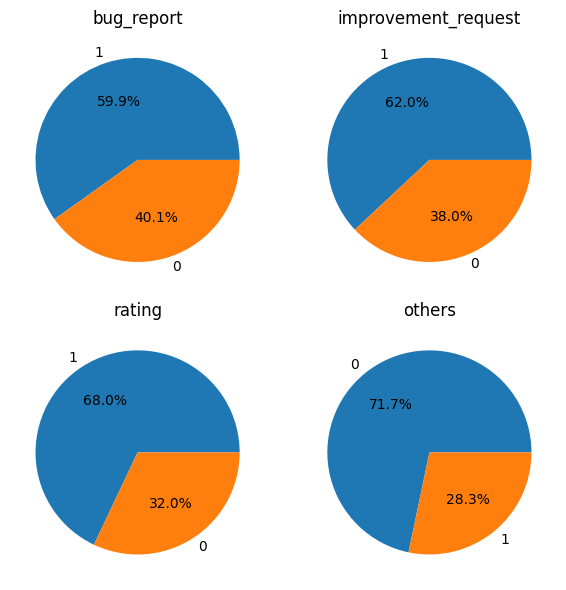

In [ ]:
columns = ['bug_report', 'improvement_request', 'rating', 'others']
pies_plot(columns, dataset)

1. character count
2. word count
3. max sentence's character and word count
4. mean word length
5. mean sentence length

In [ ]:
dataset['char_count'] = dataset['review'].str.len()
dataset['word_count'] = dataset['review'].str.split().str.len()
display(dataset.head())

,review,bug_report,improvement_request,rating,others,char_count,word_count
0,يبيله تصليحات كثير,1,1,1,0,18,3
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,0,1,1,1,33,6
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,0,1,1,0,76,13
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,0,0,1,0,45,8
4,تبين م لي ي تم ل يب,0,0,1,1,19,7


In [ ]:
sortedDataset = dataset.sort_values('char_count', ascending=False)

sortedDataset.head()

,review,bug_report,improvement_request,rating,others,char_count,word_count
902,من فضلك أعد المحاولة\nمن فضلك أعد المحاولة\nمن...,0,0,0,1,3023,576
87,أكثر من مليار تحميل.... لكن فيه عيوب العيب الأ...,1,1,1,0,500,89
170,غير متقولوش لعائشة اذا كان علابالي راح نبعتلكم...,0,0,0,1,500,100
369,العبة جميلة جدا جدا جداجدا جديد جدا حمام الدار...,0,0,1,1,500,100
1264,انا كويس الحمد والشكر على كل شيء شي من برا بس ...,0,0,0,1,499,106


In [ ]:
dataset['mean_word_length'] = dataset['review'].map(lambda r: np.mean([len(word) for word in r.split()]))
dataset['mean_sent_length'] = dataset['review'].map(lambda r: np.mean([len(sent) for sent in tokenize.sent_tokenize(r)]))
dataset.head()

,review,bug_report,improvement_request,rating,others,char_count,word_count,mean_word_length,mean_sent_length
0,يبيله تصليحات كثير,1,1,1,0,18,3,5.333333,18.0
1,ماتحملت ابدددددا ونا دفعت فلوس 🤔😕,0,1,1,1,33,6,4.666667,33.0
2,اتمنى منكم عمل خيار لتفضيل المسلسل بالكامل عوض...,0,1,1,0,76,13,4.923077,76.0
3,ممتاز وبسيط وتشغيله لا يؤثر على سرعة الانترنت,0,0,1,0,45,8,4.750000,45.0
4,تبين م لي ي تم ل يب,0,0,1,1,19,7,1.857143,19.0


# Preprocessing

In [ ]:
import re

sample = [
    'ماتحملت ابدددددا ونا دفعت الفلوس',
    'ألسلام عليكم في الناس كلب',
    'الََعبة جميلة جدا جدا جداجدا جديد جدا حمام الدار...',
    'ييييي السال',
    'ااا لللل ععع',
    'مما ننا ككا'
]

def custom_preprocessing(sentences):
  sentences_proccesed = []
  for sentence in sentences:
    # Delete جميع الحركات
    sentence = re.sub(r'[\u064B-\u0652]', '', sentence)

    # Delete تحويل (أ, إ) الى ا
    sentence = re.sub(r'[أإ]', 'ا', sentence)

    # Delete حروف الجر, كان واخواتها
    sentence = re.sub(r'\b(فى|في|على|من|الى|كان|لكن)\b', ' ', sentence)

    # Replace ة الى ه
    sentence = re.sub(r'ة', r'ه', sentence)

    # Delete التعريف
    sentence = re.sub(r'\bال', '', sentence)

    # Delete الحرف المكرر اكثر من مرتين بالتوالي
    sentence = re.sub(r'(.)\1{2,}', r'\1\1', sentence)

    # Replace كل حرف يتكرر مرتين الى حرف واحد ما عدا الميم
    sentence = re.sub(r'(?!م|ن)(.)\1', r'\1', sentence)

    # Delete اي حرف لحاله
    sentence = re.sub(r'\b\w\b', '', sentence)

    # Delete اي كلمة اطول من 16 حرف
    sentence = ' '.join(word for word in sentence.split() if len(word) <= 16)

    # Delete اي علامة تتكرر مره وحده بس
    sentence = re.sub(r'([^\w\s])\1', '', sentence)

    sentences_proccesed.append(sentence)

  return sentences_proccesed

processed_samples = custom_preprocessing(sample)
print(processed_samples)

['ماتحملت ابدا ونا دفعت فلوس', 'سلام عليكم ناس كلب', 'عبه جميله جدا جدا جداجدا جديد جدا حمام دار.', 'سال', '', 'مما ننا كا']


In [ ]:
df = pd.DataFrame({'Original Sentences': train_sentences, 'Processed Sentences': custom_preprocessing(train_sentences)})

df['proccesed word count'] = df['Processed Sentences'].str.split().apply(len)
df['word count'] = df['Original Sentences'].str.split().apply(len)

df = df.sort_values(by='proccesed word count', ascending=False)

In [ ]:
display(df.head(30))

,Original Sentences,Processed Sentences,proccesed word count,word count
1363,من فضلك أعد المحاولة\nمن فضلك أعد المحاولة\nمن...,فضلك اعد محاوله فضلك اعد محاوله فضلك اعد محاول...,432,576
1683,انا كويس الحمد والشكر على كل شيء شي من برا بس ...,انا كويس حمد والشكر كل شيء شي برا بس مو كل شي ...,95,106
192,غير متقولوش لعائشة اذا كان علابالي راح نبعتلكم...,غير متقولوش لعائشه اذا علابالي راح نبعتلكم تصو...,86,100
83,بكل حياديه وتجرد انقل تجربتي التطبيق جميل جدا ...,بكل حياديه وتجرد انقل تجربتي تطبيق جميل جدا جد...,85,92
85,جميل جداً ورائع لكن احس في بعض العيوب الليالي ...,جميل جدا ورائع احس بعض عيوب ليالي بيعلق معي كث...,84,93
289,كل ما افتح مقطع يوتيوب يطلع اعلان\nكل ما افتح ...,كل ما افتح مقطع يوتيوب يطلع اعلان كل ما افتح م...,81,84
924,نصابين ، لاحدا يشتري من المتجر ، بالآخر خسران ...,نصابين ، لاحدا يشتري متجر ، بالآخر خسران قد ما...,79,85
1591,العبة جميلة جدا جدا جداجدا جديد جدا حمام الدار...,عبه جميله جدا جدا جداجدا جديد جدا حمام دار اور...,78,100
1953,والله فرحنا كثيراً بتطبيق مطبعة الملك فهد لكن ...,واله فرحنا كثيرا بتطبيق مطبعه ملك فهد لاسف به ...,77,92
1302,اعزائي الزملاء : بما اني احد منسوبي الصحة ، فه...,اعزائي زملاء : بما اني احد منسوبي صحه ، فهذا ت...,73,76


## Tokenizing

In [ ]:
def word_tokenize(docs):
  return [nltk.word_tokenize(doc) for doc in docs]

train_sentences_tokenized = word_tokenize(custom_preprocessing(train_sentences))
val_sentences_tokenized = word_tokenize(custom_preprocessing(val_sentences))
test_sentences_tokenized = word_tokenize(custom_preprocessing(test_sentences))

In [ ]:
vocab = set([word for sublist in train_sentences_tokenized for word in sublist])
print(" Number of unique vocab: ", len(vocab))

 Number of unique vocab:  7863


9324 unique vocab without pre-processing

# Models : (Random method will have 25%)

## Baseline model from scrach

### Encoding

In [ ]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_sentences_tokenized)
train_sentences_encoded = word_tokenizer.texts_to_sequences(train_sentences_tokenized)

In [ ]:
# val_tokenizer = Tokenizer()
# val_tokenizer.fit_on_texts(val_sentences_tokenized)
val_word_encoded = word_tokenizer.texts_to_sequences(val_sentences_tokenized)

In [ ]:
# test_tokenizer = Tokenizer()
# test_tokenizer.fit_on_texts(test_sentences_tokenized)
test_word_encoded = word_tokenizer.texts_to_sequences(test_sentences_tokenized)

In [ ]:
MAX_SEQ_LENGTH = max([len(seq) for seq in train_sentences_encoded])
print("Max sequence's length: ", MAX_SEQ_LENGTH)
train_sentences_padded = pad_sequences(train_sentences_encoded, maxlen=MAX_SEQ_LENGTH, padding='post')
val_sentences_padded = pad_sequences(val_word_encoded, maxlen=MAX_SEQ_LENGTH, padding='post')
test_sentences_padded = pad_sequences(test_word_encoded, maxlen=MAX_SEQ_LENGTH, padding='post')

Max sequence's length:  432


### Build model


In [ ]:
def build_model(MAX_SEQ_LENGTH, vocab_size, embedding_dim):
    model = keras.Sequential()

    model.add(layers.Embedding(input_length=MAX_SEQ_LENGTH, input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True))

    model.add(layers.Bidirectional(layers.LSTM(512)))

    model.add(layers.Dense(4, activation="sigmoid"))

    return model

In [ ]:
embedding_dim = 300
vocab_size = len(vocab) + 1
model = build_model(MAX_SEQ_LENGTH, vocab_size, embedding_dim)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", metrics.Recall(), metrics.Precision()])

### Training


In [ ]:
EPOCHS = 20
BATCH_SIZE = 16

model.fit(
    train_sentences_padded, train_labels,
    validation_data=(val_sentences_padded,val_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)
# 0.5540

Epoch 1/20
127/127 [==============================] - 69s 155ms/step - loss: 0.0124 - accuracy: 0.6729 - recall_3: 0.9946 - precision_2: 0.9952 - val_loss: 1.2282 - val_accuracy: 0.5494 - val_recall_3: 0.7163 - val_precision_2: 0.7099
Epoch 2/20
127/127 [==============================] - 9s 74ms/step - loss: 0.0049 - accuracy: 0.6921 - recall_3: 0.9986 - precision_2: 0.9989 - val_loss: 1.4013 - val_accuracy: 0.5425 - val_recall_3: 0.7189 - val_precision_2: 0.6999
Epoch 3/20
127/127 [==============================] - 8s 62ms/step - loss: 0.0063 - accuracy: 0.6483 - recall_3: 0.9975 - precision_2: 0.9977 - val_loss: 1.4423 - val_accuracy: 0.5379 - val_recall_3: 0.7124 - val_precision_2: 0.7106
Epoch 4/20
127/127 [==============================] - 6s 44ms/step - loss: 0.0031 - accuracy: 0.7025 - recall_3: 0.9992 - precision_2: 0.9986 - val_loss: 1.4548 - val_accuracy: 0.5149 - val_recall_3: 0.7060 - val_precision_2: 0.6943
Epoch 5/20
127/127 [==============================] - 7s 59ms/step

### Testing ???

In [ ]:
prediction = model.predict(val_sentences_padded)
threshold = 0.5
predicted_labels = (prediction > threshold).astype(int)
accuracy = np.mean(predicted_labels == val_labels)

TP = np.sum((predicted_labels == 1) & (val_labels == 1))
FP = np.sum((predicted_labels == 1) & (val_labels == 0))
FN = np.sum((predicted_labels == 0) & (val_labels == 1))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
F1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", F1)

14/14 [==============================] - 3s 9ms/step
Accuracy: 0.7350574712643678
Precision: 0.7065073041168659
Recall: 0.689119170984456
F1 Score: 0.6977049180327869


In [ ]:
model.evaluate(test_sentences_padded, test_labels)

14/14 [==============================] - 1s 65ms/step - loss: 1.6925 - accuracy: 0.5448 - recall_3: 0.7166 - precision_2: 0.7026


[1.6925048828125, 0.5448275804519653, 0.7165563106536865, 0.7025973796844482]

In [ ]:
import random

# Generate a random index
i = random.randint(0, len(prediction) - 1)

# Print the corresponding values
print(f"Test Sentence [{i}]:")
print(test_sentences[i])
print(custom_preprocessing([test_sentences[i]]))

print("bug_report	improvement_request	rating	others")
print("\nPrediction:")
print(predicted_labels[i])
print("\nTrue Label:")
print(test_labels[i])


Test Sentence [299]:
برنامج مو حلو اتمنى يكون الدعس فيه مفتوح يكون حماس
['برنامج مو حلو اتمنى يكون دعس فيه مفتوح يكون حماس']
bug_report	improvement_request	rating	others

Prediction:
[0 0 1 0]

True Label:
[0 1 1 0]


In [ ]:
sample = ['اللعبة فيها مشكله']
sample_processed = custom_preprocessing(sample)
sample_processed_tokenized = word_tokenize(sample_processed)
sample_sentences_encoded = word_tokenizer.texts_to_sequences(sample_processed_tokenized)
sample_processed_padded = pad_sequences(sample_sentences_encoded, maxlen=MAX_SEQ_LENGTH, padding='post')

sample_prediction_label = model.predict(sample_processed_padded)
sample_prediction_label = (sample_prediction_label > threshold).astype(int)
print(sample)
print(sample_processed)
print(sample_prediction_label)

1/1 [==============================] - 0s 36ms/step
['اللعبة فيها مشكله']
['لعبه فيها مشكله']
[[1 0 1 0]]


## model with pretrained embedding

### Encoding

In [ ]:
word2vec_model = Word2Vec(train_sentences_tokenized, vector_size=100, window=5, min_count=1, workers=4)

def preprocessing_train(data):
  sentences = [[word2vec_model.wv.get_index(word) for word in words if word in word2vec_model.wv.index_to_key] for words in data]
  MAX_SEQ_LENGTH = max(len(seq) for seq in sentences)
  sentences_padded = np.array([seq + [0]*(MAX_SEQ_LENGTH - len(seq)) for seq in sentences])
  return sentences_padded, MAX_SEQ_LENGTH

def preprocessing_eval(data, MAX_SEQ_LENGTH):
  sentences = [[word2vec_model.wv.get_index(word) for word in words if word in word2vec_model.wv.index_to_key] for words in data]
  sentences_padded = np.array([seq + [0]*(MAX_SEQ_LENGTH - len(seq)) for seq in sentences])
  return sentences_padded


train_sentences_padded, MAX_SEQ_LENGTH = preprocessing_train(train_sentences_tokenized)
val_sentences_padded = preprocessing_eval(val_sentences_tokenized, MAX_SEQ_LENGTH)
test_sentences_padded = preprocessing_eval(val_sentences_tokenized, MAX_SEQ_LENGTH)

### Build model

In [ ]:
def build_model(MAX_SEQ_LENGTH, embedding_dim):
    model = keras.Sequential()

    model.add(layers.Embedding(input_length=MAX_SEQ_LENGTH, input_dim=len(word2vec_model.wv.index_to_key), output_dim=embedding_dim, mask_zero=True))

    model.add(layers.Bidirectional(layers.LSTM(512)))

    model.add(layers.Dense(4, activation="sigmoid"))

    return model

In [ ]:
model = build_model(MAX_SEQ_LENGTH, embedding_dim)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Training


In [ ]:
EPOCHS = 20
BATCH_SIZE = 16

model.fit(
    train_sentences_padded, train_labels,
    validation_data=(val_sentences_padded ,val_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/20
127/127 [==============================] - 63s 425ms/step - loss: 0.5816 - accuracy: 0.4473 - val_loss: 0.5238 - val_accuracy: 0.5494
Epoch 2/20
127/127 [==============================] - 40s 314ms/step - loss: 0.3430 - accuracy: 0.6429 - val_loss: 0.5389 - val_accuracy: 0.5655
Epoch 3/20
127/127 [==============================] - 38s 297ms/step - loss: 0.1446 - accuracy: 0.7010 - val_loss: 0.6713 - val_accuracy: 0.5839
Epoch 4/20
127/127 [==============================] - 32s 234ms/step - loss: 0.0552 - accuracy: 0.6813 - val_loss: 0.7167 - val_accuracy: 0.5517
Epoch 5/20
127/127 [==============================] - 33s 262ms/step - loss: 0.0236 - accuracy: 0.6857 - val_loss: 0.9036 - val_accuracy: 0.5816
Epoch 6/20
127/127 [==============================] - 35s 257ms/step - loss: 0.0144 - accuracy: 0.7059 - val_loss: 0.9885 - val_accuracy: 0.5678
Epoch 7/20
127/127 [==============================] - 32s 256ms/step - loss: 0.0088 - accuracy: 0.7172 - val_loss: 1.0480 - val_ac

### Testing ???


In [ ]:
prediction = model.predict(test_sentences_padded)
threshold = 0.5
predicted_classes = (prediction > threshold).astype(int)
accuracy = np.mean(predicted_classes == test_labels)

print("Accuracy:", accuracy)

14/14 [==============================] - 1s 42ms/step
Accuracy: 0.5522988505747126


In [ ]:
loss, accuracy = model.evaluate(test_sentences_padded, test_labels)

14/14 [==============================] - 1s 28ms/step - loss: 3.1066 - accuracy: 0.3172


## pretrained model

## Proper hyper-parameter tuning based on the validation set

## Classification analysis and possible improvements.


## Final results on the test set.